# Decision Tree

## References

https://www.kaggle.com/datasets/kadirduran/hr-dataset

## Import Python Libraries

In [510]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils import resample

## Global Variables

In [511]:
# random state 
random_state = 4781
# random_state = 7644

# colors
c_scale = 256
c1 = (1, 1, 1) # grey
c2 = (1, 0, 0) # red
c3 = (181/c_scale, 204/c_scale, 6/c_scale) # yellow
c4 = (6/c_scale, 122/c_scale, 204/c_scale) # blue
c5 = (0, 0, 0) # black

## Import Dataset

In [512]:
# Source: https://www.kaggle.com/datasets/kadirduran/hr-dataset

# Dataset Column Overview: 
# ------------------------------------------------------------------------------

# X1: satisfaction_level : It is employee satisfaction point, which ranges from 0-1.
# X2: last_evaluation : It is evaluated performance by the employer, which also ranges from 0-1.
# X3: number_projects : How many of projects assigned to an employee?
# X4: average_monthly_hours: How many hours in averega an employee worked in a month?
# X5: time_spent_company : time_spent_company means employee experience. The number of years spent by an employee in the company.
# X6: work_accident : Whether an employee has had a work accident or not.
# X7: promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.
# X8: Departments : Employee's working department/division.
# X9: Salary : Salary level of the employee such as low, medium and high.
#  y: left : Whether the employee has left the company or not.

In [513]:
# load heart.csv dataset from github
filepath1 = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/hr_dataset.csv'
df0 = pd.read_csv(filepath1, header = 0)
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [514]:
# identify X_cols and y_col
all_cols = df0.columns.values.copy()
y_col = 'left'
cond1 = all_cols != y_col
X_cols = all_cols[cond1]

In [515]:
# standardize column names
df1 = df0.copy()
zeros = len(str(len(X_cols)))
new_all_cols = all_cols
temp = (np.arange(0, len(X_cols)) + 1).astype('str')

new_y_col = 'y'
new_X_cols = ['X' + i.zfill(zeros) for i in temp]

new_all_cols[cond1] = new_X_cols
new_all_cols[~cond1] = new_y_col

df1.columns = new_all_cols

df1.head()

,X1,X2,X3,X4,X5,X6,y,X7,X8,X9
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [516]:
# check data structure
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      14999 non-null  float64
 1   X2      14999 non-null  float64
 2   X3      14999 non-null  int64  
 3   X4      14999 non-null  int64  
 4   X5      14999 non-null  int64  
 5   X6      14999 non-null  int64  
 6   y       14999 non-null  int64  
 7   X7      14999 non-null  int64  
 8   X8      14999 non-null  object 
 9   X9      14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [517]:
# describe data
df1.describe()

,X1,X2,X3,X4,X5,X6,y,X7
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [518]:
# check missing values
df1.count()

X1    14999
X2    14999
X3    14999
X4    14999
X5    14999
X6    14999
y     14999
X7    14999
X8    14999
X9    14999
dtype: int64

## Data Cleaning

Not Needed

## Transform Dataset

In [519]:
# encode X08 to numerical values
le = LabelEncoder()
df1[['X8','X9']] = df1[['X8','X9']].apply(le.fit_transform)

df1.head()

,X1,X2,X3,X4,X5,X6,y,X7,X8,X9
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [520]:
# response column
y_col = new_y_col
y_col

'y'

In [521]:
# predictor columns
cond1 = df1.columns != y_col
X_cols = df1.columns[cond1]
X_cols

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'], dtype='object')

In [522]:
# get unique y_labels
y_labels = ['left', 'stayed']
# y_labels = {y_labels[i]: i for i in range(len(y_labels))}
y_labels = {i:y_labels[i] for i in range(len(y_labels))}
y_labels

{0: 'left', 1: 'stayed'}

In [523]:
# rename y_labels
df1.y = df1.y.replace(y_labels)
df1.head()

,X1,X2,X3,X4,X5,X6,y,X7,X8,X9
0,0.38,0.53,2,157,3,0,stayed,0,7,1
1,0.80,0.86,5,262,6,0,stayed,0,7,2
2,0.11,0.88,7,272,4,0,stayed,0,7,2
3,0.72,0.87,5,223,5,0,stayed,0,7,1
4,0.37,0.52,2,159,3,0,stayed,0,7,1


In [524]:
# check label distribution
temp = list(y_labels.values())
cond1 = df1.y == temp[0]
cond2 = df1.y == temp[1]

n_1 = np.sum(cond1)
print(temp[0])
print(n_1)

n_2 = np.sum(cond2)
print(temp[1])
print(n_2)

# upsample minority label
df_temp = df1.loc[cond2,:]
n_diff = n_1 - n_2
print(n_diff)

df_upsample = resample(
  df_temp,
  replace = True,
  n_samples = n_diff,
  random_state = random_state
)

# update df1
df1 = pd.concat([df1, df_upsample], ignore_index = True)
df1.info()

left
11428
stayed
3571
7857
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22856 entries, 0 to 22855
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      22856 non-null  float64
 1   X2      22856 non-null  float64
 2   X3      22856 non-null  int64  
 3   X4      22856 non-null  int64  
 4   X5      22856 non-null  int64  
 5   X6      22856 non-null  int64  
 6   y       22856 non-null  object 
 7   X7      22856 non-null  int64  
 8   X8      22856 non-null  int32  
 9   X9      22856 non-null  int32  
dtypes: float64(2), int32(2), int64(5), object(1)
memory usage: 1.6+ MB


In [525]:
# # check label distribution
# temp = list(y_labels.values())
# cond1 = df1.y == temp[0]
# cond2 = df1.y == temp[1]

# n_1 = np.sum(cond1)
# print(temp[0])
# print(n_1)

# n_2 = np.sum(cond2)
# print(temp[1])
# print(n_2)

# # downsample majority label
# df_temp = df1.loc[cond1,:]
# n_diff = n_1 - n_2
# print(n_diff)

# df_upsample = resample(
#   df_temp,
#   replace = False,
#   n_samples = n_diff,
#   random_state = random_state
# )

# # # update df1
# df1 = df1.drop(df_upsample.index)
# df1.info()

In [526]:
# normalize all X_cols
df2 = df1.copy()
# norm = StandardScaler()
# norm = MinMaxScaler()
norm = RobustScaler()
df2[X_cols] = norm.fit_transform(df2[X_cols])

df2.head()

,X1,X2,X3,X4,X5,X6,y,X7,X8,X9
0,-0.439024,-0.617647,-0.666667,-0.48,0.0,0.0,stayed,0.0,0.0,0.0
1,0.585366,0.352941,0.333333,0.57,3.0,0.0,stayed,0.0,0.0,1.0
2,-1.097561,0.411765,1.000000,0.67,1.0,0.0,stayed,0.0,0.0,1.0
3,0.390244,0.382353,0.333333,0.18,2.0,0.0,stayed,0.0,0.0,0.0
4,-0.463415,-0.647059,-0.666667,-0.46,0.0,0.0,stayed,0.0,0.0,0.0


In [527]:
# # remove outliers from each column
# for X in X_cols:
#   cond1 = ~((df2[X] >= 3) | (df2[X] <= -3))
#   df2 = df2.loc[cond1,:]
  
# df2.info()

In [528]:
# melt df2 into a dataframe where cols become stacked as rows
df3 = df2.melt(
  id_vars = y_col,
  value_vars = X_cols,
  var_name = 'X',
  value_name = "X_value"
)
df3.head()

,y,X,X_value
0,stayed,X1,-0.439024
1,stayed,X1,0.585366
2,stayed,X1,-1.097561
3,stayed,X1,0.390244
4,stayed,X1,-0.463415


## Visualize Dataset

In [529]:
# figure setup
fig_cols = 3
fig_rows = np.ceil(len(X_cols)/fig_cols).astype('int')
y_max = np.round(df2[X_cols].max().max(), 0)
y_min = np.round(df2[X_cols].min().min(), 0)
n_levels = df2.y.unique().size
palette1 = [c1 for i in range(n_levels)]
palette2 = [c3, c4]
figsize = (15, 15)

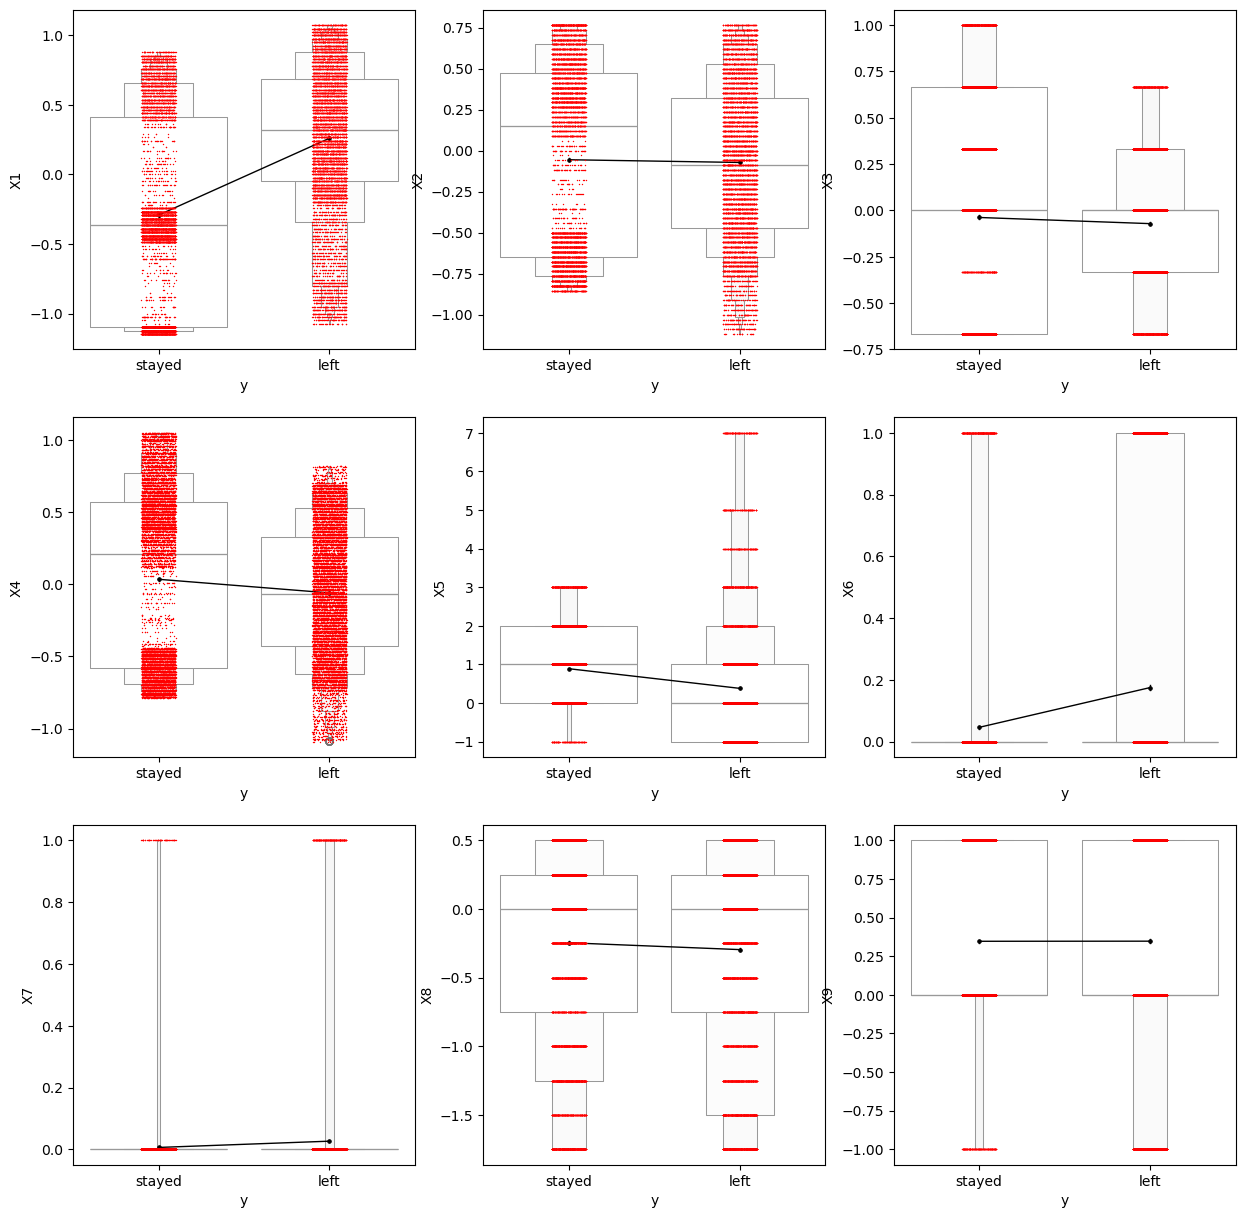

In [530]:
# subplot of y vs each X (stripplot + violinplot + boxenplot)
f1, axes = plt.subplots(fig_rows, fig_cols, figsize = figsize)
itr = 0
for x in X_cols:
  row = np.floor(itr/fig_cols) 
  row = row.astype('int')
  col = np.mod(itr, fig_cols)
  col = col.astype('int') 
  # print(row)
  # print(col)
  # p1 = sns.violinplot(ax = axes[row, col], data = df2, x = y_col, y = x, hue = y_col, palette = palette1)
  p2 = sns.boxenplot(ax = axes[row, col], data = df2, x = y_col, y = x, hue = y_col, palette = palette1)
  p3 = sns.stripplot(ax = axes[row, col], data = df2, x = y_col, y = x, color = c2, size = 1)
  p4 = sns.pointplot(ax = axes[row, col], data = df2, x = y_col, y = x, color = c5, linewidth = 1)
  axes[row, col].legend_ = None
  # axes[row, col].set_ylim(y_min, y_max)
  itr = itr + 1

## Feature Selection

### Remove Features Having % Similar Values or More

In [531]:
# porportion similar (p)
p = 1
# porportion dissimilar (q = 1- p)
q = 1 - p

print(p,q)

1 0


In [532]:
# initialize variance threshold model (based on porportion dissimilar)
myfit = VarianceThreshold(q)

In [533]:
# fit model
temp = myfit.fit_transform(df2[X_cols])
temp.shape

(22856, 9)

In [534]:
# get columns that have at least p-similar or q-disimilar values
X_cols_var_threshold = myfit.get_feature_names_out()
X_cols_var_threshold

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'], dtype=object)

In [535]:
# update X_cols
X_cols = X_cols_var_threshold
X_cols

array(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9'], dtype=object)

### Select Features Using Model Selection Methods

In [536]:
# seperate data into X and y
X = df2[X_cols]
y = np.ravel(df2[y_col])

In [537]:
# estimator model
estimator_model = RandomForestClassifier(
  n_estimators = 20,
  max_depth = 1000,
  criterion = 'gini',
  random_state = random_state
)    

In [538]:
# fit estimmator model
temp = estimator_model.fit(X, y)

In [539]:
# feature importance values
feature_importance = estimator_model.feature_importances_
feature_importance

array([0.31073653, 0.09759188, 0.15779283, 0.14872348, 0.25268931,
       0.00668128, 0.00117052, 0.01521233, 0.00940185])

In [540]:
# threshold feature importance
feature_importance_threshold = np.mean(feature_importance)
# feature_importance_threshold = np.median(feature_importance)
# feature_importance_threshold = np.quantile(feature_importance, q = 0.5)
feature_importance_threshold

0.1111111111111111

In [541]:
# initialize SelectFromModel
myfit = SelectFromModel(
  estimator = estimator_model,
  threshold = feature_importance_threshold
)

In [542]:
# fit SelectFromModel
temp = myfit.fit_transform(X, y)

In [543]:
# get columns kept from ensemble - random forest feature selection
X_cols_rf = myfit.get_feature_names_out()
X_cols_rf

array(['X1', 'X3', 'X4', 'X5'], dtype=object)

## Train and Test ML Model

In [544]:
# X_cols to include after feature selection
# X_include = X.columns
X_include = X_cols_rf
print(len(X_include))
print(X_include)

4
['X1' 'X3' 'X4' 'X5']


In [545]:
# split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X[X_include], y, 
  stratify = y, shuffle = True, 
  train_size = 0.8, random_state = random_state
)

In [546]:
# initialize Decision Tree model
myfit = DecisionTreeClassifier(
  criterion = 'gini',
  # min_samples_split = 10,
  random_state = random_state
)

In [547]:
# fit model
temp = myfit.fit(X_train, y_train)

In [548]:
# get predictions on test data
y_hat = myfit.predict(X_test)

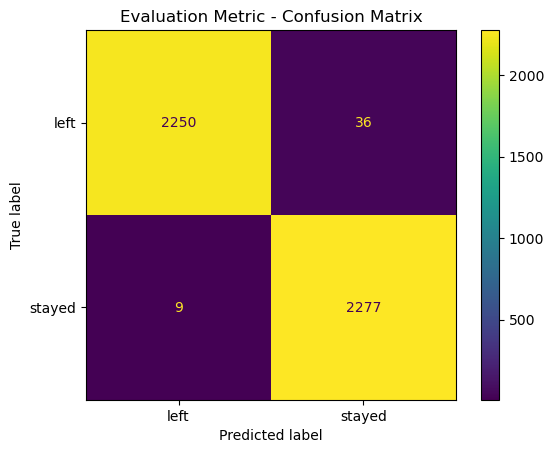

In [549]:
# model evaluation - confusion matrix

# get confusion matrix
cm = confusion_matrix(
  y_true = y_test,
  y_pred = y_hat
)

# show confusion matrix visual
labels = myfit.classes_
p1 = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
p1.plot()
plt.title('Evaluation Metric - Confusion Matrix')
plt.show()

In [550]:
# model evaluation - recall, precision , F1-score
metric_report = classification_report(y_true = y_test, y_pred = y_hat, output_dict = False, zero_division = 0) 
print(metric_report)

              precision    recall  f1-score   support

        left       1.00      0.98      0.99      2286
      stayed       0.98      1.00      0.99      2286

    accuracy                           0.99      4572
   macro avg       0.99      0.99      0.99      4572
weighted avg       0.99      0.99      0.99      4572

